# **Nhom 2: Chieu thu 2**


Load pickle file from drive

In [1]:
import pandas as pd

X_train = pd.read_pickle(r'drive/MyDrive/Colab/X_train.p')
y_train = pd.read_pickle(r'drive/MyDrive/Colab/y_train.p')
X_val = pd.read_pickle(r'drive/MyDrive/Colab/X_val.p')
y_val = pd.read_pickle(r'drive/MyDrive/Colab/y_val.p')

Build model

In [3]:
from keras.applications import VGG16
from keras.layers import Dense, Input, Flatten, MaxPool2D, Dropout
from keras.models import Model
import numpy as np 
from keras.optimizers import Adam
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=10,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              fill_mode="nearest")

model_vgg16_conv = VGG16(include_top=False, weights='imagenet')
input_ = tf.keras.layers.Input(shape=(300,300,3),name = 'image_input')
output_vgg16_conv = model_vgg16_conv(input_)
#Add the fully-connected layers 

x = MaxPool2D(name='maxpool')(output_vgg16_conv)
x = Flatten(name='flatten')(x)
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dropout(rate = 0.1)(x)
x = Dense(64, activation='relu', name='fc2')(x)
x = Dense(4, activation='softmax', name='predictions')(x)

adam = Adam(learning_rate=1e-4, decay = 1e-4/20)
breast_classifier = Model(input_,x)


breast_classifier.compile(optimizer = adam, 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])


58892288/58889256 [==============================] - 1s 0us/step


In [4]:
breast_classifier.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 300, 300, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
maxpool (MaxPooling2D)       (None, 4, 4, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 1024)              8389632   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
fc2 (Dense)                  (None, 64)                65600 

In [5]:
history = breast_classifier.fit(train_datagen.flow(X_train, y_train, batch_size=64),validation_data=(X_val, y_val), epochs=50)


Epoch 1/50
23/23 [==============================] - 83s 2s/step - loss: 4.9033 - accuracy: 0.2318 - val_loss: 1.3816 - val_accuracy: 0.2822
Epoch 2/50
23/23 [==============================] - 31s 1s/step - loss: 1.3760 - accuracy: 0.2908 - val_loss: 1.3857 - val_accuracy: 0.2209
Epoch 3/50
23/23 [==============================] - 31s 1s/step - loss: 1.3836 - accuracy: 0.2823 - val_loss: 1.3677 - val_accuracy: 0.2945
Epoch 4/50
23/23 [==============================] - 31s 1s/step - loss: 1.3610 - accuracy: 0.3198 - val_loss: 1.3846 - val_accuracy: 0.2822
Epoch 5/50
23/23 [==============================] - 31s 1s/step - loss: 1.3478 - accuracy: 0.3040 - val_loss: 1.1209 - val_accuracy: 0.4908
Epoch 6/50
23/23 [==============================] - 31s 1s/step - loss: 1.2267 - accuracy: 0.4330 - val_loss: 1.2649 - val_accuracy: 0.4110
Epoch 7/50
23/23 [==============================] - 31s 1s/step - loss: 1.2321 - accuracy: 0.4259 - val_loss: 1.3513 - val_accuracy: 0.3067
Epoch 8/50
23/23 [==

Save model and history

In [6]:
breast_classifier.save("drive/MyDrive/Colab/breast_classifier.h5")

In [7]:
import pickle
pickle.dump(history.history, open("history_CNN.p", "wb"))

Visualization result

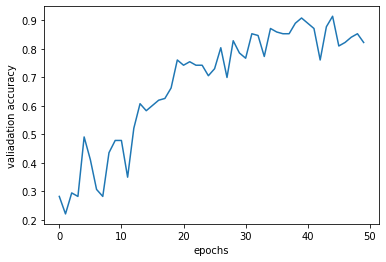

In [13]:
import matplotlib.pylab as plt

plt.xlabel('epochs')
plt.ylabel('valiadation accuracy')
plt.plot(history.history['val_accuracy'])

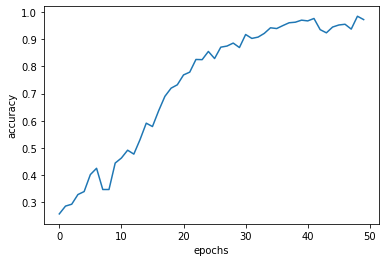

In [12]:
import matplotlib.pylab as plt

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'])

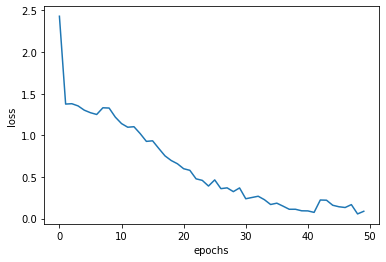

In [15]:
import matplotlib.pylab as plt

plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'])

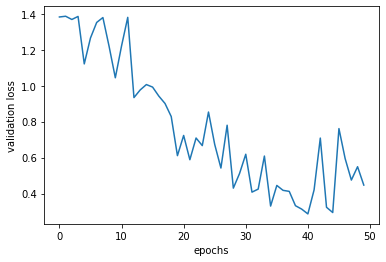

In [14]:
import matplotlib.pylab as plt

plt.xlabel('epochs')
plt.ylabel('validation loss')
plt.plot(history.history['val_loss'])